 EXERCICE 1 : ÉCARTS ENTRE NOMBRES PREMIERS

In [3]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
# === Étape 1 : Crible simple ===
@njit
def simple_sieve(limit):
    sieve = np.ones(limit + 1, dtype=np.uint8)
    sieve[:2] = 0
    for i in range(2, int(limit**0.5) + 1):
        if sieve[i]:
            for j in range(i*i, limit + 1, i):
                sieve[j] = 0
    primes = np.where(sieve == 1)[0]
    return primes
simple_sieve(10**7)

array([      2,       3,       5, ..., 9999971, 9999973, 9999991])

In [4]:
# === Étape 2 : Crible segmenté ===
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
@njit
def segmented_sieve(n):
    limit = int(np.sqrt(n)) + 1
    primes = simple_sieve(limit)

    low = limit
    high = 2 * limit
    result = list(primes)
    sieve = np.empty(limit, dtype=np.uint8)

    while low < n:
        if high > n:
            high = n + 1
        sieve[:] = 1
        for p in primes:
            start = (low + p - 1) // p * p
            for j in range(start, high, p):
                sieve[j - low] = 0
        for i in range(low, high):
            if sieve[i - low]:
                result.append(i)
        low = high
        high += limit
    return np.array(result)
segmented_sieve(10**7)

array([      2,       3,       5, ..., 9999971, 9999973, 9999991])

In [42]:
def compute_gaps_and_ratios(primes):
    gaps = np.diff(primes)
    ratios = gaps / np.log(primes[:-1])
    return gaps, ratios
print("Calcul des écarts g_k et des ratios g_k / log(p_k)...")
gaps, ratios = compute_gaps_and_ratios(primes)

Calcul des écarts g_k et des ratios g_k / log(p_k)...


Affichage de l'histogramme des ratios et estimation de l'espérance...


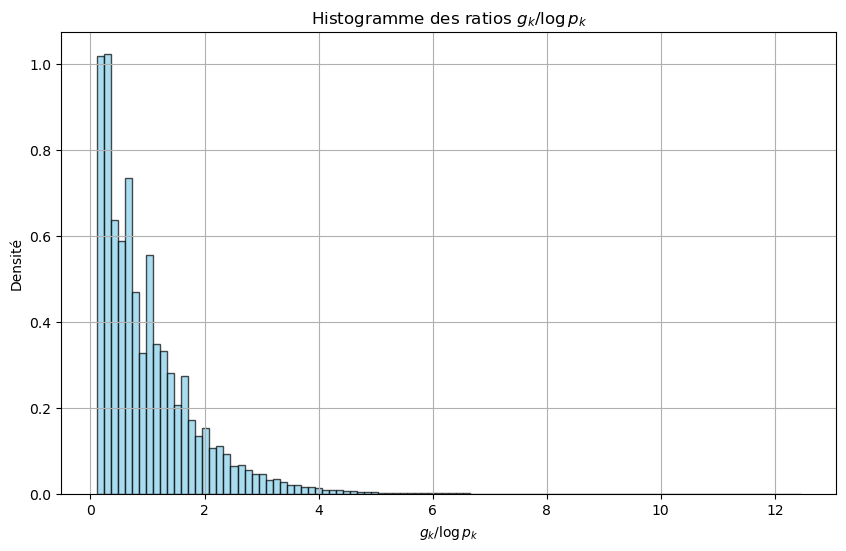

Espérance empirique du ratio g_k / log(p_k) : 1.0001


In [43]:
# === Étape 4 : Affichage histogramme + estimation espérance ===
def plot_histogram_and_expectation(ratios, bins=100):
    plt.figure(figsize=(10, 6))
    plt.hist(ratios, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel(r'$g_k / \log p_k$')
    plt.ylabel('Densité')
    plt.title('Histogramme des ratios $g_k / \log p_k$')
    plt.grid(True)
    plt.show()

    expectation = np.mean(ratios)
    print(f"Espérance empirique du ratio g_k / log(p_k) : {expectation:.4f}")
    return expectation
print("Affichage de l'histogramme des ratios et estimation de l'espérance...")
expectation = plot_histogram_and_expectation(ratios)

In [44]:
#comparaison
def compare_expectations():
    bounds = [10**7, 10**8]
    for bound in bounds:
        print(f"\n--- Calcul pour bornes jusqu'à {bound} ---")
        primes = segmented_sieve(bound)
        print(f"  → {len(primes)} nombres premiers trouvés.")
        gaps, ratios = compute_gaps_and_ratios(primes)
        expectation = np.mean(ratios)
        print(f"  → Espérance de g_k / log(p_k) : {expectation:.5f}")
compare_expectations()


--- Calcul pour bornes jusqu'à 10000000 ---
  → 664579 nombres premiers trouvés.
  → Espérance de g_k / log(p_k) : 1.00051

--- Calcul pour bornes jusqu'à 100000000 ---
  → 5761455 nombres premiers trouvés.
  → Espérance de g_k / log(p_k) : 1.00013


Affichage de l'histogram with exponential


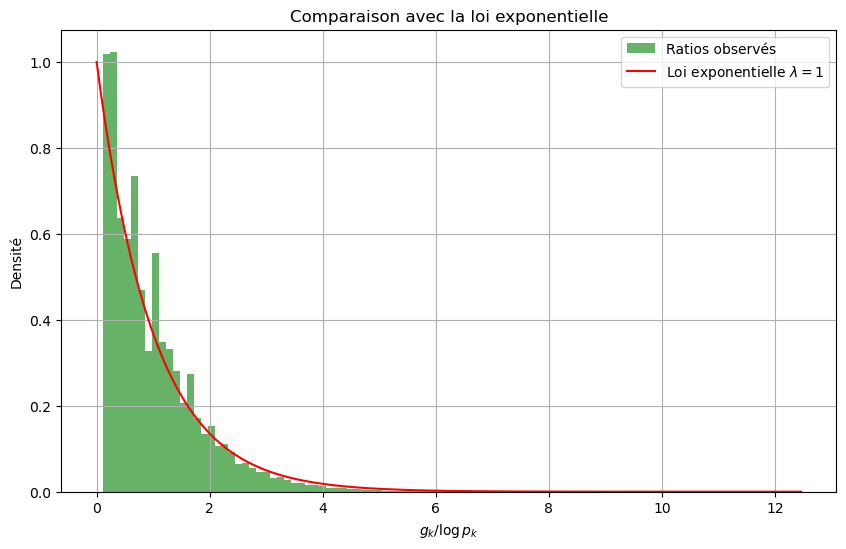

In [47]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

def plot_ratios_vs_exponential(ratios, bins=100):
    plt.figure(figsize=(10, 6))

    # Histogramme des ratios normalisés
    plt.hist(ratios, bins=bins, density=True, alpha=0.6, label='Densité empirique', color='skyblue', edgecolor='black')

    # Densité de la loi exponentielle de paramètre λ = 1
    x = np.linspace(0, max(ratios), 500)
    plt.plot(x, expon.pdf(x, scale=1), 'r-', lw=2, label=r'Loi exponentielle $\lambda = 1$')

    plt.xlabel(r"$\frac{g_k}{\log p_k}$")
    plt.ylabel("Densité")
    plt.title("Histogramme des ratios $g_k / \log p_k$ vs loi exponentielle")
    plt.legend()
    plt.grid(True)
    plt.show()

print("Affichage de l'histogram with exponential")
expectation = plot_histogram_with_exponential(ratios)

In [9]:
import numpy as np
from numba import njit

@njit
#Étape 1 : Crible simple
def simple_sieve(limit):
    """
    Crible d'Ératosthène simple pour trouver tous les premiers ≤ limit.
    Renvoie un tableau numpy des nombres premiers.
    """
    sieve = np.ones(limit + 1, dtype=np.uint8)  # 1 = premier, 0 = non premier
    sieve[:2] = 0  # 0 et 1 ne sont pas premiers

    for i in range(2, int(limit**0.5) + 1):
        if sieve[i]:
            for j in range(i*i, limit + 1, i):
                sieve[j] = 0  # Marquer les multiples comme non premiers

    primes = np.where(sieve == 1)[0]
    return primes
print("Calcul des nombres premiers jusqu'à 10^7...")
primes = segmented_sieve(10**7)
print(f"Nombre de nombres premiers trouvés : {len(primes)}")



Calcul des nombres premiers jusqu'à 10^7...
Nombre de nombres premiers trouvés : 664579


In [11]:
# === Étape 2 : Crible segmenté ===
@njit
def segmented_sieve(n):
    limit = int(np.sqrt(n)) + 1
    primes = simple_sieve(limit)

    low = limit
    high = 2 * limit
    result = list(primes)
    sieve = np.empty(limit, dtype=np.uint8)

    while low < n:
        if high > n:
            high = n + 1
        sieve[:] = 1
        for p in primes:
            start = (low + p - 1) // p * p
            for j in range(start, high, p):
                sieve[j - low] = 0
        for i in range(low, high):
            if sieve[i - low]:
                result.append(i)
        low = high
        high += limit
    return np.array(result)
print("Calcul des écarts et ratios...")
gaps, ratios = compute_gaps_and_ratios(primes)




Calcul des écarts et ratios...


Affichage de l'histogramme des ratios et estimation de l'espérance...


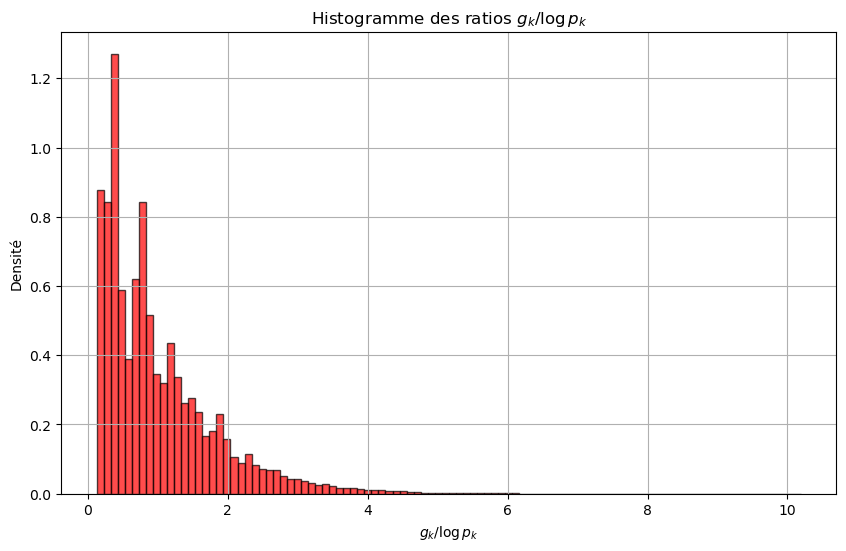

Espérance empirique du ratio g_k / log(p_k) : 1.0005


In [13]:
# === Étape 4 : Affichage histogramme + estimation espérance ===
def plot_histogram_and_expectation(ratios, bins=100):
    plt.figure(figsize=(10, 6))
    plt.hist(ratios, bins=bins, density=True, alpha=0.7, color='red', edgecolor='black')
    plt.xlabel(r'$g_k / \log p_k$')
    plt.ylabel('Densité')
    plt.title('Histogramme des ratios $g_k / \log p_k$')
    plt.grid(True)
    plt.show()

    expectation = np.mean(ratios)
    print(f"Espérance empirique du ratio g_k / log(p_k) : {expectation:.4f}")
    return expectation
print("Affichage de l'histogramme des ratios et estimation de l'espérance...")
expectation = plot_histogram_and_expectation(ratios)


In [14]:
# Étape 1+2 : Trouver les premiers jusqu'à 10^8
print("Calcul des nombres premiers jusqu'à 10^8...")
primes = segmented_sieve(10**8)
print(f"Nombre de nombres premiers trouvés : {len(primes)}")


Calcul des nombres premiers jusqu'à 10^8...
Nombre de nombres premiers trouvés : 5761455


In [16]:
def compare_expectations():
    bounds = [10**7, 10**8]
    for bound in bounds:
        print(f"\n--- Calcul pour bornes jusqu'à {bound} ---")
        primes = segmented_sieve(bound)
        print(f"  → {len(primes)} nombres premiers trouvés.")
        gaps, ratios = compute_gaps_and_ratios(primes)
        expectation = np.mean(ratios)
        print(f"  → Espérance de g_k / log(p_k) : {expectation:.5f}")
compare_expectations()


--- Calcul pour bornes jusqu'à 10000000 ---
  → 664579 nombres premiers trouvés.
  → Espérance de g_k / log(p_k) : 1.00051

--- Calcul pour bornes jusqu'à 100000000 ---
  → 5761455 nombres premiers trouvés.
  → Espérance de g_k / log(p_k) : 1.00013


Affichage de des ratio vs exponential


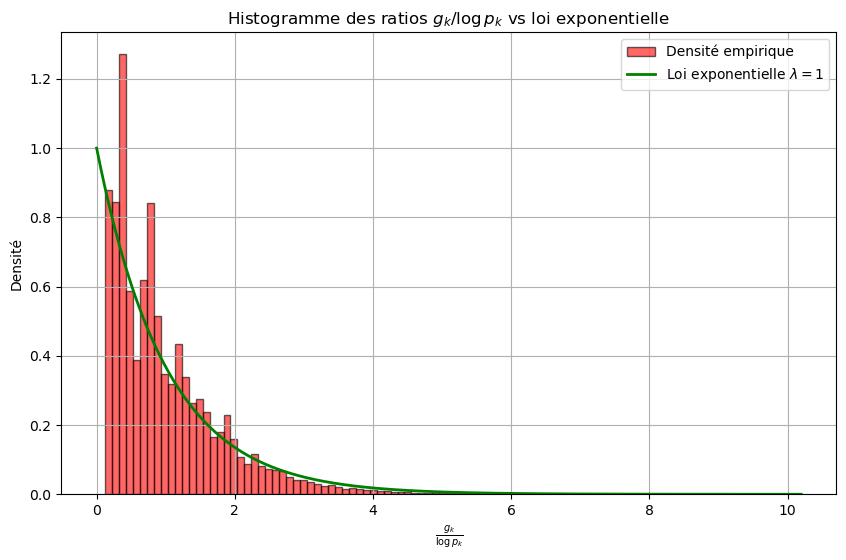

In [34]:
#conjecture
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

def plot_ratios_vs_exponential(ratios, bins=100):
    plt.figure(figsize=(10, 6))

    # Histogramme des ratios normalisés
    plt.hist(ratios, bins=bins, density=True, alpha=0.6, label='Densité empirique', color='red', edgecolor='black')

    # Densité de la loi exponentielle de paramètre λ = 1
    x = np.linspace(0, max(ratios), 500)
    plt.plot(x, expon.pdf(x, scale=1), lw=2, label='Loi exponentielle $\lambda = 1$',color = "green")

    plt.xlabel(r"$\frac{g_k}{\log p_k}$")
    plt.ylabel("Densité")
    plt.title("Histogramme des ratios $g_k / \log p_k$ vs loi exponentielle")
    plt.legend()
    plt.grid(True)
    plt.show()
print("Affichage de des ratio vs exponential")
expectation = plot_ratios_vs_exponential(ratios)

In [22]:
#comparaison
def compare_expectations():
    bounds = [10**7, 10**8]
    for bound in bounds:
        print(f"\n--- Calcul pour bornes jusqu'à {bound} ---")
        primes = segmented_sieve(bound)
        print(f"  → {len(primes)} nombres premiers trouvés.")
        gaps, ratios = compute_gaps_and_ratios(primes)
        expectation = np.mean(ratios)
        print(f"  → Espérance de g_k / log(p_k) : {expectation:.5f}")
compare_expectations()


--- Calcul pour bornes jusqu'à 10000000 ---
  → 664579 nombres premiers trouvés.
  → Espérance de g_k / log(p_k) : 1.00051

--- Calcul pour bornes jusqu'à 100000000 ---
  → 5761455 nombres premiers trouvés.
  → Espérance de g_k / log(p_k) : 1.00013
